In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import pprint
import pyspark
import pyspark.sql.functions as F

from pyspark.sql.functions import col
from pyspark.sql.types import StringType, IntegerType, FloatType, DateType

import utils.data_processing_bronze_table
import utils.data_processing_silver_table
import utils.data_processing_gold_table

print('Done!')

Done!


## Set up PySpark session

In [2]:
# Initialize SparkSession
spark = pyspark.sql.SparkSession.builder \
    .appName("dev") \
    .master("local[*]") \
    .getOrCreate()

# Set log level to ERROR to hide warnings
spark.sparkContext.setLogLevel("ERROR")

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/05/20 03:48:57 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


## Set up Config

In [3]:
# set up config
snapshot_date_str = "2023-01-01"

start_date_str = "2023-01-01"
end_date_str = "2025-12-01"

In [4]:
# generate list of dates to process
def generate_first_of_month_dates(start_date_str, end_date_str):
    # Convert the date strings to datetime objects
    start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
    end_date = datetime.strptime(end_date_str, "%Y-%m-%d")
    
    # List to store the first of month dates
    first_of_month_dates = []

    # Start from the first of the month of the start_date
    current_date = datetime(start_date.year, start_date.month, 1)

    while current_date <= end_date:
        # Append the date in yyyy-mm-dd format
        first_of_month_dates.append(current_date.strftime("%Y-%m-%d"))
        
        # Move to the first of the next month
        if current_date.month == 12:
            current_date = datetime(current_date.year + 1, 1, 1)
        else:
            current_date = datetime(current_date.year, current_date.month + 1, 1)

    return first_of_month_dates

dates_str_lst = generate_first_of_month_dates(start_date_str, end_date_str)
dates_str_lst

['2023-01-01',
 '2023-02-01',
 '2023-03-01',
 '2023-04-01',
 '2023-05-01',
 '2023-06-01',
 '2023-07-01',
 '2023-08-01',
 '2023-09-01',
 '2023-10-01',
 '2023-11-01',
 '2023-12-01',
 '2024-01-01',
 '2024-02-01',
 '2024-03-01',
 '2024-04-01',
 '2024-05-01',
 '2024-06-01',
 '2024-07-01',
 '2024-08-01',
 '2024-09-01',
 '2024-10-01',
 '2024-11-01',
 '2024-12-01',
 '2025-01-01',
 '2025-02-01',
 '2025-03-01',
 '2025-04-01',
 '2025-05-01',
 '2025-06-01',
 '2025-07-01',
 '2025-08-01',
 '2025-09-01',
 '2025-10-01',
 '2025-11-01',
 '2025-12-01']

## Build Bronze Table

### LMS

In [5]:
# create bronze datalake
# create multiple csv files 
bronze_lms_directory = "datamart/bronze/lms/"

if not os.path.exists(bronze_lms_directory):
    os.makedirs(bronze_lms_directory)

In [6]:
# run bronze backfill
for date_str in dates_str_lst:
    utils.data_processing_bronze_table.process_bronze_table_lms(date_str, bronze_lms_directory, spark)

2023-01-01row count: 530


saved to: datamart/bronze/lms/bronze_loan_daily_2023_01_01.csv


2023-02-01row count: 1031
saved to: datamart/bronze/lms/bronze_loan_daily_2023_02_01.csv
2023-03-01row count: 1537
saved to: datamart/bronze/lms/bronze_loan_daily_2023_03_01.csv
2023-04-01row count: 2047
saved to: datamart/bronze/lms/bronze_loan_daily_2023_04_01.csv
2023-05-01row count: 2568
saved to: datamart/bronze/lms/bronze_loan_daily_2023_05_01.csv
2023-06-01row count: 3085
saved to: datamart/bronze/lms/bronze_loan_daily_2023_06_01.csv
2023-07-01row count: 3556
saved to: datamart/bronze/lms/bronze_loan_daily_2023_07_01.csv
2023-08-01row count: 4037
saved to: datamart/bronze/lms/bronze_loan_daily_2023_08_01.csv
2023-09-01row count: 4491
saved to: datamart/bronze/lms/bronze_loan_daily_2023_09_01.csv
2023-10-01row count: 4978
saved to: datamart/bronze/lms/bronze_loan_daily_2023_10_01.csv
2023-11-01row count: 5469
saved to: datamart/bronze/lms/bronze_loan_daily_2023_11_01.csv
2023-12-01row count: 5428
saved to: datamart/bronze/lms/bronze_loan_daily_2023_12_01.csv
2024-01-01row count: 

In [7]:
# inspect output
utils.data_processing_bronze_table.process_bronze_table_lms(dates_str_lst[0], bronze_lms_directory, spark).toPandas()

2023-01-01row count: 530
saved to: datamart/bronze/lms/bronze_loan_daily_2023_01_01.csv


,loan_id,Customer_ID,loan_start_date,tenure,installment_num,loan_amt,due_amt,paid_amt,overdue_amt,balance,snapshot_date
0,CUS_0x1037_2023_01_01,CUS_0x1037,2023-01-01,10,0,10000,0.0,0.0,0.0,10000.0,2023-01-01
1,CUS_0x1069_2023_01_01,CUS_0x1069,2023-01-01,10,0,10000,0.0,0.0,0.0,10000.0,2023-01-01
2,CUS_0x114a_2023_01_01,CUS_0x114a,2023-01-01,10,0,10000,0.0,0.0,0.0,10000.0,2023-01-01
3,CUS_0x1184_2023_01_01,CUS_0x1184,2023-01-01,10,0,10000,0.0,0.0,0.0,10000.0,2023-01-01
4,CUS_0x1297_2023_01_01,CUS_0x1297,2023-01-01,10,0,10000,0.0,0.0,0.0,10000.0,2023-01-01
...,...,...,...,...,...,...,...,...,...,...,...
525,CUS_0xe98_2023_01_01,CUS_0xe98,2023-01-01,10,0,10000,0.0,0.0,0.0,10000.0,2023-01-01
526,CUS_0xea6_2023_01_01,CUS_0xea6,2023-01-01,10,0,10000,0.0,0.0,0.0,10000.0,2023-01-01
527,CUS_0xed3_2023_01_01,CUS_0xed3,2023-01-01,10,0,10000,0.0,0.0,0.0,10000.0,2023-01-01
528,CUS_0xed8_2023_01_01,CUS_0xed8,2023-01-01,10,0,10000,0.0,0.0,0.0,10000.0,2023-01-01


### Features Clickstream

In [8]:
# create bronze datalake
# create multiple csv files 
bronze_clickstream_directory = "datamart/bronze/clickstream/"

if not os.path.exists(bronze_clickstream_directory):
    os.makedirs(bronze_clickstream_directory)

In [9]:
# run bronze backfill
for date_str in dates_str_lst:
    utils.data_processing_bronze_table.process_bronze_table_clickstream(date_str, bronze_clickstream_directory, spark)

2023-01-01row count: 8974
saved to: datamart/bronze/clickstream/bronze_clickstream_2023_01_01.csv
2023-02-01row count: 8974
saved to: datamart/bronze/clickstream/bronze_clickstream_2023_02_01.csv
2023-03-01row count: 8974
saved to: datamart/bronze/clickstream/bronze_clickstream_2023_03_01.csv
2023-04-01row count: 8974
saved to: datamart/bronze/clickstream/bronze_clickstream_2023_04_01.csv
2023-05-01row count: 8974
saved to: datamart/bronze/clickstream/bronze_clickstream_2023_05_01.csv
2023-06-01row count: 8974
saved to: datamart/bronze/clickstream/bronze_clickstream_2023_06_01.csv
2023-07-01row count: 8974
saved to: datamart/bronze/clickstream/bronze_clickstream_2023_07_01.csv
2023-08-01row count: 8974
saved to: datamart/bronze/clickstream/bronze_clickstream_2023_08_01.csv
2023-09-01row count: 8974
saved to: datamart/bronze/clickstream/bronze_clickstream_2023_09_01.csv
2023-10-01row count: 8974
saved to: datamart/bronze/clickstream/bronze_clickstream_2023_10_01.csv
2023-11-01row count:

In [10]:
# inspect output
utils.data_processing_bronze_table.process_bronze_table_clickstream(dates_str_lst[0], bronze_clickstream_directory, spark).toPandas()

2023-01-01row count: 8974
saved to: datamart/bronze/clickstream/bronze_clickstream_2023_01_01.csv


,fe_1,fe_2,fe_3,fe_4,fe_5,fe_6,fe_7,fe_8,fe_9,fe_10,...,fe_13,fe_14,fe_15,fe_16,fe_17,fe_18,fe_19,fe_20,Customer_ID,snapshot_date
0,63,118,80,121,55,193,111,112,-101,83,...,-16,-81,-126,114,35,85,-73,76,CUS_0x1037,2023-01-01
1,-108,182,123,4,-56,27,25,-6,284,222,...,-14,-96,200,35,130,94,111,75,CUS_0x1069,2023-01-01
2,-13,8,87,166,214,-98,215,152,129,139,...,26,86,171,125,-130,354,17,302,CUS_0x114a,2023-01-01
3,-85,45,200,89,128,54,76,51,61,139,...,172,96,174,163,37,207,180,118,CUS_0x1184,2023-01-01
4,55,120,226,-86,253,97,107,68,103,126,...,76,43,183,159,-26,104,118,184,CUS_0x1297,2023-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8969,242,54,14,-84,86,-6,29,22,-6,52,...,197,58,71,61,-141,243,133,77,CUS_0xdf6,2023-01-01
8970,155,200,71,-79,221,223,74,-10,124,211,...,-12,155,10,24,178,49,156,-153,CUS_0xe23,2023-01-01
8971,143,2,42,248,163,-13,-13,20,183,183,...,202,64,105,289,51,77,-20,89,CUS_0xe4e,2023-01-01
8972,109,161,161,29,57,122,-61,223,66,0,...,101,125,249,116,138,-8,160,94,CUS_0xedd,2023-01-01


### Features Attributes

In [11]:
# create bronze datalake
bronze_attributes_directory = "datamart/bronze/attributes/"

if not os.path.exists(bronze_attributes_directory):
    os.makedirs(bronze_attributes_directory)

In [12]:
# No need to be partitioned
utils.data_processing_bronze_table.process_bronze_table_attributes(bronze_attributes_directory, spark).toPandas()

row count: 12500
saved to: datamart/bronze/attributes/bronze_attributes.csv


,Customer_ID,Name,Age,SSN,Occupation,snapshot_date
0,CUS_0x1000,Alistair Barrf,18,913-74-1218,Lawyer,2023-05-01
1,CUS_0x1009,Arunah,26,063-67-6938,Mechanic,2025-01-01
2,CUS_0x100b,Shirboni,19,#F%$D@*&8,Media_Manager,2024-03-01
3,CUS_0x1011,Schneyerh,44,793-05-8223,Doctor,2023-11-01
4,CUS_0x1013,Cameront,44,930-49-9615,Mechanic,2023-12-01
...,...,...,...,...,...,...
12495,CUS_0xff3,Somervilled,55,#F%$D@*&8,Scientist,2024-06-01
12496,CUS_0xff4,Poornimaf,37,655-05-7666,Entrepreneur,2024-12-01
12497,CUS_0xff6,Shieldsb,19,541-92-8371,Doctor,2024-10-01
12498,CUS_0xffc,Brads,18,226-86-7294,Musician,2024-01-01


### Features Financials

In [13]:
# create bronze datalake
bronze_financials_directory = "datamart/bronze/financials/"

if not os.path.exists(bronze_financials_directory):
    os.makedirs(bronze_financials_directory)

In [14]:
# No need to be partitioned
utils.data_processing_bronze_table.process_bronze_table_financials(bronze_financials_directory, spark).toPandas()

row count: 12500
saved to: datamart/bronze/financials/bronze_financials.csv


,Customer_ID,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,snapshot_date
0,CUS_0x1000,30625.94,2706.161667,6,5,27,2,"Credit-Builder Loan, and Home Equity Loan",57,26,...,Bad,1562.91,30.077191,10 Years and 9 Months,Yes,42.941090,77.31427572208112,High_spent_Medium_value_payments,400.36080052211616,2023-05-01
1,CUS_0x1009,52312.68_,4250.390000,6,5,17,4,"Not Specified, Home Equity Loan, Credit-Builde...",5,18,...,_,202.68,40.286997,31 Years and 0 Months,Yes,108.366467,58.66019164829086,High_spent_Medium_value_payments,508.01234122645366,2025-01-01
2,CUS_0x100b,113781.38999999998,9549.782500,1,4,1,0,None,14,8,...,Good,1030.2,28.592943,15 Years and 10 Months,No,0.000000,617.0792665202719,High_spent_Small_value_payments,597.8989834797281,2024-03-01
3,CUS_0x1011,58918.47,5208.872500,3,3,17,3,"Student Loan, Credit-Builder Loan, and Debt Co...",27,13,...,Standard,473.14,27.829959,15 Years and 10 Months,Yes,123.434939,383.35084463651407,Low_spent_Medium_value_payments,294.1014665671429,2023-11-01
4,CUS_0x1013,98620.98,7962.415000,3,3,6,3,"Student Loan, Debt Consolidation Loan, and Per...",12,9,...,Good,1233.51,26.524864,17 Years and 10 Months,No,228.018084,332.3337079767732,High_spent_Medium_value_payments,485.8897083704929,2023-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,CUS_0xff3,17032.785,1176.398750,0,6,2,3,"Personal Loan, Mortgage Loan, and Auto Loan",13,7_,...,Good,1229.08,26.915577,17 Years and 3 Months,No,33.299764,81.19585741743609,Low_spent_Small_value_payments,293.14425404017936,2024-06-01
12496,CUS_0xff4,25546.26,2415.855000,8,7,14,5_,"Not Specified, Student Loan, Student Loan, Cre...",15,13_,...,Standard,758.44,39.333488,18 Years and 9 Months,Yes,101.328637,189.81586133347676,Low_spent_Medium_value_payments,230.44100130267208,2024-12-01
12497,CUS_0xff6,117639.92,9727.326667,5,6,1,2,"Home Equity Loan, and Auto Loan",-3,7,...,Good,338.3,32.871853,24 Years and 11 Months,No,126.638453,534.0885271982645,Low_spent_Medium_value_payments,592.0056861539196,2024-10-01
12498,CUS_0xffc,60877.17,5218.097500,6,8,27,8,"Credit-Builder Loan, Payday Loan, Not Specifie...",46,14,...,_,1300.13,29.026498,13 Years and 1 Months,Yes,272.809169,46.4256138380274,High_spent_Large_value_payments,442.5749666782518,2024-01-01


## Build Silver Table

### LMS

In [15]:
# create silver datalake
silver_loan_daily_directory = "datamart/silver/loan_daily/"

if not os.path.exists(silver_loan_daily_directory):
    os.makedirs(silver_loan_daily_directory)

In [16]:
# run silver backfill
for date_str in dates_str_lst:
    utils.data_processing_silver_table.process_silver_table_lms(date_str, bronze_lms_directory, silver_loan_daily_directory, spark)

loaded from: datamart/bronze/lms/bronze_loan_daily_2023_01_01.csv row count: 530


saved to: datamart/silver/loan_daily/silver_loan_daily_2023_01_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2023_02_01.csv row count: 1031
saved to: datamart/silver/loan_daily/silver_loan_daily_2023_02_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2023_03_01.csv row count: 1537
saved to: datamart/silver/loan_daily/silver_loan_daily_2023_03_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2023_04_01.csv row count: 2047
saved to: datamart/silver/loan_daily/silver_loan_daily_2023_04_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2023_05_01.csv row count: 2568
saved to: datamart/silver/loan_daily/silver_loan_daily_2023_05_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2023_06_01.csv row count: 3085
saved to: datamart/silver/loan_daily/silver_loan_daily_2023_06_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2023_07_01.csv row count: 3556
saved to: datamart/silver/loan_daily/silver_loan_daily_2023_07_0

saved to: datamart/silver/loan_daily/silver_loan_daily_2023_09_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2023_10_01.csv row count: 4978
saved to: datamart/silver/loan_daily/silver_loan_daily_2023_10_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2023_11_01.csv row count: 5469
saved to: datamart/silver/loan_daily/silver_loan_daily_2023_11_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2023_12_01.csv row count: 5428
saved to: datamart/silver/loan_daily/silver_loan_daily_2023_12_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2024_01_01.csv row count: 5412


saved to: datamart/silver/loan_daily/silver_loan_daily_2024_01_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2024_02_01.csv row count: 5424


saved to: datamart/silver/loan_daily/silver_loan_daily_2024_02_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2024_03_01.csv row count: 5425
saved to: datamart/silver/loan_daily/silver_loan_daily_2024_03_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2024_04_01.csv row count: 5417
saved to: datamart/silver/loan_daily/silver_loan_daily_2024_04_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2024_05_01.csv row count: 5391
saved to: datamart/silver/loan_daily/silver_loan_daily_2024_05_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2024_06_01.csv row count: 5418
saved to: datamart/silver/loan_daily/silver_loan_daily_2024_06_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2024_07_01.csv row count: 5442
saved to: datamart/silver/loan_daily/silver_loan_daily_2024_07_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2024_08_01.csv row count: 5531
saved to: datamart/silver/loan_daily/silver_loan_daily_2024_08_0

In [17]:
utils.data_processing_silver_table.process_silver_table_lms(dates_str_lst[0], bronze_lms_directory, silver_loan_daily_directory, spark).toPandas()

loaded from: datamart/bronze/lms/bronze_loan_daily_2023_01_01.csv row count: 530
saved to: datamart/silver/loan_daily/silver_loan_daily_2023_01_01.parquet


,loan_id,Customer_ID,loan_start_date,tenure,installment_num,loan_amt,due_amt,paid_amt,overdue_amt,balance,snapshot_date,mob,installments_missed,first_missed_date,dpd
0,CUS_0x1037_2023_01_01,CUS_0x1037,2023-01-01,10,0,10000.0,0.0,0.0,0.0,10000.0,2023-01-01,0,0,None,0
1,CUS_0x1069_2023_01_01,CUS_0x1069,2023-01-01,10,0,10000.0,0.0,0.0,0.0,10000.0,2023-01-01,0,0,None,0
2,CUS_0x114a_2023_01_01,CUS_0x114a,2023-01-01,10,0,10000.0,0.0,0.0,0.0,10000.0,2023-01-01,0,0,None,0
3,CUS_0x1184_2023_01_01,CUS_0x1184,2023-01-01,10,0,10000.0,0.0,0.0,0.0,10000.0,2023-01-01,0,0,None,0
4,CUS_0x1297_2023_01_01,CUS_0x1297,2023-01-01,10,0,10000.0,0.0,0.0,0.0,10000.0,2023-01-01,0,0,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,CUS_0xe98_2023_01_01,CUS_0xe98,2023-01-01,10,0,10000.0,0.0,0.0,0.0,10000.0,2023-01-01,0,0,None,0
526,CUS_0xea6_2023_01_01,CUS_0xea6,2023-01-01,10,0,10000.0,0.0,0.0,0.0,10000.0,2023-01-01,0,0,None,0
527,CUS_0xed3_2023_01_01,CUS_0xed3,2023-01-01,10,0,10000.0,0.0,0.0,0.0,10000.0,2023-01-01,0,0,None,0
528,CUS_0xed8_2023_01_01,CUS_0xed8,2023-01-01,10,0,10000.0,0.0,0.0,0.0,10000.0,2023-01-01,0,0,None,0


### Features Clickstream

### Features Attributes + Financials (Customer)

In [18]:
# create silver datalake
silver_customer_directory = "datamart/silver/customer/"

if not os.path.exists(silver_customer_directory):
    os.makedirs(silver_customer_directory)

In [19]:
utils.data_processing_silver_table.process_silver_table_customer(bronze_attributes_directory, bronze_financials_directory, silver_customer_directory, spark).toPandas()

loaded from: datamart/bronze/attributes/bronze_attributes.csv row count: 12500
loaded from: datamart/bronze/financials/bronze_financials.csv row count: 12500
12500


saved to: datamart/silver/customer/silver_customer.parquet


,Customer_ID,snapshot_date,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,years,months,Credit_History_Months,spending_scale,value_payments_scale
0,CUS_0x1000,2023-05-01,Alistair Barrf,18,913-74-1218,Lawyer,30625.939453,2706.161621,6,5,...,Yes,42.941090,77.314278,High_spent_Medium_value_payments,400.360809,10,9,129,2,2
1,CUS_0x1009,2025-01-01,Arunah,26,063-67-6938,Mechanic,52312.679688,4250.390137,6,5,...,Yes,108.366470,58.660191,High_spent_Medium_value_payments,508.012329,31,0,372,2,2
2,CUS_0x100b,2024-03-01,Shirboni,19,#F%$D@*&8,Media_Manager,113781.390625,9549.782227,1,4,...,No,0.000000,617.079285,High_spent_Small_value_payments,597.898987,15,10,190,2,1
3,CUS_0x1011,2023-11-01,Schneyerh,44,793-05-8223,Doctor,58918.468750,5208.872559,3,3,...,Yes,123.434937,383.350830,Low_spent_Medium_value_payments,294.101471,15,10,190,1,2
4,CUS_0x1013,2023-12-01,Cameront,44,930-49-9615,Mechanic,98620.976562,7962.415039,3,3,...,No,228.018082,332.333710,High_spent_Medium_value_payments,485.889709,17,10,214,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,CUS_0xff3,2024-06-01,Somervilled,55,#F%$D@*&8,Scientist,17032.785156,1176.398804,0,6,...,No,33.299763,81.195854,Low_spent_Small_value_payments,293.144257,17,3,207,1,1
12496,CUS_0xff4,2024-12-01,Poornimaf,37,655-05-7666,Entrepreneur,25546.259766,2415.854980,8,7,...,Yes,101.328636,189.815857,Low_spent_Medium_value_payments,230.440994,18,9,225,1,2
12497,CUS_0xff6,2024-10-01,Shieldsb,19,541-92-8371,Doctor,117639.921875,9727.327148,5,6,...,No,126.638451,534.088501,Low_spent_Medium_value_payments,592.005676,24,11,299,1,2
12498,CUS_0xffc,2024-01-01,Brads,18,226-86-7294,Musician,60877.171875,5218.097656,6,8,...,Yes,272.809174,46.425613,High_spent_Large_value_payments,442.574982,13,1,157,2,3


## EDA on credit labels

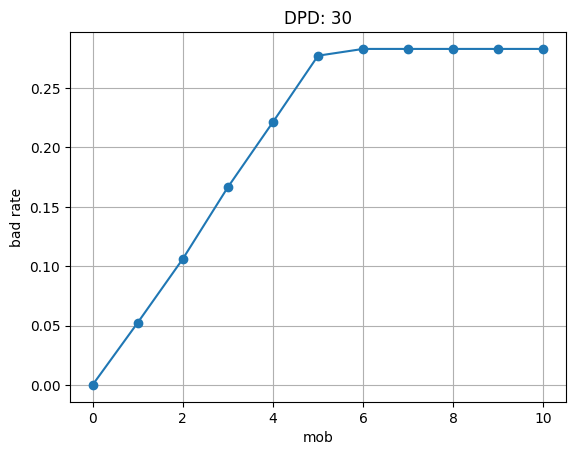

In [20]:
# set dpd label definition
dpd = 30

# Path to the folder containing CSV files
folder_path = silver_loan_daily_directory

# Read all CSV files into a single DataFrame
files_list = [folder_path+os.path.basename(f) for f in glob.glob(os.path.join(folder_path, '*'))]
df = spark.read.option("header", "true").parquet(*files_list)

# filter only completed loans
df = df.filter(col("loan_start_date") < datetime.strptime("2024-01-01", "%Y-%m-%d"))

# create dpd flag if more than dpd
df = df.withColumn("dpd_flag", F.when(col("dpd") >= dpd, 1).otherwise(0))

# actual bads 
actual_bads_df = df.filter(col("installment_num") == 10)

# prepare for analysis
# df = df.filter(col("installment_num") < 10)

# visualise bad rate
pdf = df.toPandas()

# Group by col_A and count occurrences in col_B
grouped = pdf.groupby('mob')['dpd_flag'].mean()

# Sort the index (x-axis) of the grouped DataFrame
grouped = grouped.sort_index()

# Plotting
grouped.plot(kind='line', marker='o')

plt.title('DPD: '+ str(dpd))
plt.xlabel('mob')
plt.ylabel('bad rate')
plt.grid(True)
plt.show()


In [21]:
df.show()

+--------------------+-----------+---------------+------+---------------+--------+-------+--------+-----------+-------+-------------+---+-------------------+-----------------+---+--------+
|             loan_id|Customer_ID|loan_start_date|tenure|installment_num|loan_amt|due_amt|paid_amt|overdue_amt|balance|snapshot_date|mob|installments_missed|first_missed_date|dpd|dpd_flag|
+--------------------+-----------+---------------+------+---------------+--------+-------+--------+-----------+-------+-------------+---+-------------------+-----------------+---+--------+
|CUS_0x1011_2023_1...| CUS_0x1011|     2023-11-01|    10|             10| 10000.0| 1000.0|  1000.0|        0.0|    0.0|   2024-09-01| 10|                  0|             NULL|  0|       0|
|CUS_0x1013_2023_1...| CUS_0x1013|     2023-12-01|    10|              9| 10000.0| 1000.0|  1000.0|        0.0| 1000.0|   2024-09-01|  9|                  0|             NULL|  0|       0|
|CUS_0x1018_2023_1...| CUS_0x1018|     2023-11-01|    1

## Build Gold Table for labels

In [22]:
# create gold datalake
gold_label_store_directory = "datamart/gold/label_store/"

if not os.path.exists(gold_label_store_directory):
    os.makedirs(gold_label_store_directory)

In [23]:
# run gold backfill
for date_str in dates_str_lst:
    utils.data_processing_gold_table.process_labels_gold_table_label_store(date_str, silver_loan_daily_directory, gold_label_store_directory, spark, dpd = 30, mob = 6)

loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_01_01.parquet row count: 530
Empty DataFrame
Columns: [loan_id, Customer_ID, label, label_def, snapshot_date]
Index: []
saved to: datamart/gold/label_store/gold_label_store_2023_01_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_02_01.parquet row count: 1031
Empty DataFrame
Columns: [loan_id, Customer_ID, label, label_def, snapshot_date]
Index: []


saved to: datamart/gold/label_store/gold_label_store_2023_02_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_03_01.parquet row count: 1537
Empty DataFrame
Columns: [loan_id, Customer_ID, label, label_def, snapshot_date]
Index: []
saved to: datamart/gold/label_store/gold_label_store_2023_03_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_04_01.parquet row count: 2047
Empty DataFrame
Columns: [loan_id, Customer_ID, label, label_def, snapshot_date]
Index: []
saved to: datamart/gold/label_store/gold_label_store_2023_04_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_05_01.parquet row count: 2568
Empty DataFrame
Columns: [loan_id, Customer_ID, label, label_def, snapshot_date]
Index: []
saved to: datamart/gold/label_store/gold_label_store_2023_05_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_06_01.parquet row count: 3085
Empty DataFrame
Columns: [loan_id, Customer_ID, label, label_def, s

saved to: datamart/gold/label_store/gold_label_store_2023_09_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_10_01.parquet row count: 4978
                   loan_id Customer_ID  label   label_def snapshot_date
0    CUS_0x1056_2023_04_01  CUS_0x1056      1  30dpd_6mob    2023-10-01
1    CUS_0x11fc_2023_04_01  CUS_0x11fc      0  30dpd_6mob    2023-10-01
2    CUS_0x1216_2023_04_01  CUS_0x1216      1  30dpd_6mob    2023-10-01
3    CUS_0x1285_2023_04_01  CUS_0x1285      0  30dpd_6mob    2023-10-01
4    CUS_0x12be_2023_04_01  CUS_0x12be      0  30dpd_6mob    2023-10-01
..                     ...         ...    ...         ...           ...
505   CUS_0xf58_2023_04_01   CUS_0xf58      0  30dpd_6mob    2023-10-01
506   CUS_0xf8d_2023_04_01   CUS_0xf8d      0  30dpd_6mob    2023-10-01
507   CUS_0xfaf_2023_04_01   CUS_0xfaf      0  30dpd_6mob    2023-10-01
508   CUS_0xfb6_2023_04_01   CUS_0xfb6      0  30dpd_6mob    2023-10-01
509   CUS_0xfcb_2023_04_01   CUS_0xfcb     

saved to: datamart/gold/label_store/gold_label_store_2023_10_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_11_01.parquet row count: 5469
                   loan_id Customer_ID  label   label_def snapshot_date
0    CUS_0x1000_2023_05_01  CUS_0x1000      1  30dpd_6mob    2023-11-01
1    CUS_0x108a_2023_05_01  CUS_0x108a      0  30dpd_6mob    2023-11-01
2    CUS_0x10f9_2023_05_01  CUS_0x10f9      0  30dpd_6mob    2023-11-01
3    CUS_0x1119_2023_05_01  CUS_0x1119      1  30dpd_6mob    2023-11-01
4    CUS_0x1192_2023_05_01  CUS_0x1192      0  30dpd_6mob    2023-11-01
..                     ...         ...    ...         ...           ...
516   CUS_0xe2f_2023_05_01   CUS_0xe2f      0  30dpd_6mob    2023-11-01
517   CUS_0xe36_2023_05_01   CUS_0xe36      0  30dpd_6mob    2023-11-01
518   CUS_0xf01_2023_05_01   CUS_0xf01      1  30dpd_6mob    2023-11-01
519   CUS_0xf45_2023_05_01   CUS_0xf45      1  30dpd_6mob    2023-11-01
520   CUS_0xf9f_2023_05_01   CUS_0xf9f     

saved to: datamart/gold/label_store/gold_label_store_2024_08_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2024_09_01.parquet row count: 5537
                   loan_id Customer_ID  label   label_def snapshot_date
0    CUS_0x100b_2024_03_01  CUS_0x100b      0  30dpd_6mob    2024-09-01
1    CUS_0x1096_2024_03_01  CUS_0x1096      1  30dpd_6mob    2024-09-01
2    CUS_0x111c_2024_03_01  CUS_0x111c      1  30dpd_6mob    2024-09-01
3    CUS_0x112d_2024_03_01  CUS_0x112d      1  30dpd_6mob    2024-09-01
4    CUS_0x1204_2024_03_01  CUS_0x1204      1  30dpd_6mob    2024-09-01
..                     ...         ...    ...         ...           ...
506   CUS_0xdd9_2024_03_01   CUS_0xdd9      0  30dpd_6mob    2024-09-01
507   CUS_0xe09_2024_03_01   CUS_0xe09      1  30dpd_6mob    2024-09-01
508   CUS_0xe94_2024_03_01   CUS_0xe94      0  30dpd_6mob    2024-09-01
509   CUS_0xf84_2024_03_01   CUS_0xf84      0  30dpd_6mob    2024-09-01
510   CUS_0xffd_2024_03_01   CUS_0xffd     

saved to: datamart/gold/label_store/gold_label_store_2024_10_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2024_11_01.parquet row count: 5501
                   loan_id Customer_ID  label   label_def snapshot_date
0    CUS_0x1075_2024_05_01  CUS_0x1075      1  30dpd_6mob    2024-11-01
1    CUS_0x1185_2024_05_01  CUS_0x1185      0  30dpd_6mob    2024-11-01
2    CUS_0x1190_2024_05_01  CUS_0x1190      0  30dpd_6mob    2024-11-01
3    CUS_0x122f_2024_05_01  CUS_0x122f      1  30dpd_6mob    2024-11-01
4    CUS_0x1233_2024_05_01  CUS_0x1233      0  30dpd_6mob    2024-11-01
..                     ...         ...    ...         ...           ...
486   CUS_0xeea_2024_05_01   CUS_0xeea      0  30dpd_6mob    2024-11-01
487   CUS_0xf0c_2024_05_01   CUS_0xf0c      0  30dpd_6mob    2024-11-01
488   CUS_0xf4b_2024_05_01   CUS_0xf4b      1  30dpd_6mob    2024-11-01
489   CUS_0xf7d_2024_05_01   CUS_0xf7d      1  30dpd_6mob    2024-11-01
490   CUS_0xfdb_2024_05_01   CUS_0xfdb     

saved to: datamart/gold/label_store/gold_label_store_2024_11_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2024_12_01.parquet row count: 5531
                   loan_id Customer_ID  label   label_def snapshot_date
0    CUS_0x10dd_2024_06_01  CUS_0x10dd      0  30dpd_6mob    2024-12-01
1    CUS_0x1109_2024_06_01  CUS_0x1109      1  30dpd_6mob    2024-12-01
2    CUS_0x1286_2024_06_01  CUS_0x1286      0  30dpd_6mob    2024-12-01
3    CUS_0x12a8_2024_06_01  CUS_0x12a8      0  30dpd_6mob    2024-12-01
4    CUS_0x1309_2024_06_01  CUS_0x1309      0  30dpd_6mob    2024-12-01
..                     ...         ...    ...         ...           ...
493   CUS_0xe51_2024_06_01   CUS_0xe51      0  30dpd_6mob    2024-12-01
494   CUS_0xe72_2024_06_01   CUS_0xe72      0  30dpd_6mob    2024-12-01
495   CUS_0xea5_2024_06_01   CUS_0xea5      0  30dpd_6mob    2024-12-01
496   CUS_0xf70_2024_06_01   CUS_0xf70      0  30dpd_6mob    2024-12-01
497   CUS_0xff3_2024_06_01   CUS_0xff3     

saved to: datamart/gold/label_store/gold_label_store_2025_01_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2025_02_01.parquet row count: 5028
                   loan_id Customer_ID  label   label_def snapshot_date
0    CUS_0x10ac_2024_08_01  CUS_0x10ac      0  30dpd_6mob    2025-02-01
1    CUS_0x10c5_2024_08_01  CUS_0x10c5      1  30dpd_6mob    2025-02-01
2    CUS_0x1145_2024_08_01  CUS_0x1145      1  30dpd_6mob    2025-02-01
3    CUS_0x11ac_2024_08_01  CUS_0x11ac      0  30dpd_6mob    2025-02-01
4    CUS_0x122c_2024_08_01  CUS_0x122c      0  30dpd_6mob    2025-02-01
..                     ...         ...    ...         ...           ...
538  CUS_0xc5f6_2024_08_01  CUS_0xc5f6      0  30dpd_6mob    2025-02-01
539  CUS_0xc675_2024_08_01  CUS_0xc675      1  30dpd_6mob    2025-02-01
540   CUS_0xc68_2024_08_01   CUS_0xc68      1  30dpd_6mob    2025-02-01
541  CUS_0xc719_2024_08_01  CUS_0xc719      0  30dpd_6mob    2025-02-01
542   CUS_0xdfd_2024_08_01   CUS_0xdfd     

In [24]:
utils.data_processing_gold_table.process_labels_gold_table_label_store(dates_str_lst[0], silver_loan_daily_directory, gold_label_store_directory, spark, dpd = 30, mob = 6).dtypes

loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_01_01.parquet row count: 530
Empty DataFrame
Columns: [loan_id, Customer_ID, label, label_def, snapshot_date]
Index: []
saved to: datamart/gold/label_store/gold_label_store_2023_01_01.parquet


[('loan_id', 'string'),
 ('Customer_ID', 'string'),
 ('label', 'int'),
 ('label_def', 'string'),
 ('snapshot_date', 'date')]

In [25]:
folder_path = gold_label_store_directory
files_list = [folder_path+os.path.basename(f) for f in glob.glob(os.path.join(folder_path, '*'))]
df = spark.read.option("header", "true").parquet(*files_list)
print("row_count:",df.count())

unique_count = df.select("Customer_ID").distinct().count()
print("Unique Customer_IDs:", unique_count)

df.show()

row_count: 12500


Unique Customer_IDs: 12500
+--------------------+-----------+-----+----------+-------------+
|             loan_id|Customer_ID|label| label_def|snapshot_date|
+--------------------+-----------+-----+----------+-------------+
|CUS_0x10ac_2024_0...| CUS_0x10ac|    0|30dpd_6mob|   2025-02-01|
|CUS_0x10c5_2024_0...| CUS_0x10c5|    1|30dpd_6mob|   2025-02-01|
|CUS_0x1145_2024_0...| CUS_0x1145|    1|30dpd_6mob|   2025-02-01|
|CUS_0x11ac_2024_0...| CUS_0x11ac|    0|30dpd_6mob|   2025-02-01|
|CUS_0x122c_2024_0...| CUS_0x122c|    0|30dpd_6mob|   2025-02-01|
|CUS_0x1274_2024_0...| CUS_0x1274|    1|30dpd_6mob|   2025-02-01|
|CUS_0x1288_2024_0...| CUS_0x1288|    1|30dpd_6mob|   2025-02-01|
|CUS_0x12cc_2024_0...| CUS_0x12cc|    1|30dpd_6mob|   2025-02-01|
|CUS_0x1338_2024_0...| CUS_0x1338|    0|30dpd_6mob|   2025-02-01|
|CUS_0x1370_2024_0...| CUS_0x1370|    1|30dpd_6mob|   2025-02-01|
|CUS_0x1378_2024_0...| CUS_0x1378|    1|30dpd_6mob|   2025-02-01|
|CUS_0x139b_2024_0...| CUS_0x139b|    0|30dpd_6mo

In [26]:
df.printSchema()

root
 |-- loan_id: string (nullable = true)
 |-- Customer_ID: string (nullable = true)
 |-- label: integer (nullable = true)
 |-- label_def: string (nullable = true)
 |-- snapshot_date: date (nullable = true)



## Build Gold Table for features

In [27]:
# create gold datalake
gold_feature_store_directory = "datamart/gold/feature_store/"

if not os.path.exists(gold_feature_store_directory):
    os.makedirs(gold_feature_store_directory)

In [28]:
# run gold backfill
for date_str in dates_str_lst:
    utils.data_processing_gold_table.process_labels_gold_table_feature_store(date_str, silver_loan_daily_directory, silver_customer_directory, gold_feature_store_directory, spark, dpd = 30, mob = 6)

loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_01_01.parquet row count: 530
loaded from: datamart/silver/customer/silver_customer.parquet row count: 12500
0
Empty DataFrame
Columns: [loan_id, Customer_ID, loan_start_date, installments_missed, first_missed_date, dpd, Age, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Monthly_Balance, Credit_History_Months, spending_scale, value_payments_scale]
Index: []

[0 rows x 27 columns]
loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_02_01.parquet row count: 1031
loaded from: datamart/silver/customer/silver_customer.parquet row count: 12500
0
Empty DataFrame
Columns: [loan_id, Customer_ID, loan_start_date, installments_missed, first_missed_date, dpd, A